In [82]:
import os
import numpy as np
import pandas as pd
import datetime
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('airquality-dataset/sample_dataset.csv') as file:
    n_rows = len(file.readlines())

print (f'Exact number of rows: {n_rows}')

Exact number of rows: 23567842


In [3]:
Data = pd.read_csv('airquality-dataset/sample_dataset.csv', index_col=0)

/home/usman/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23567841 entries, 0 to 25976646
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   channel_id  int64  
 1   pm2_5       float64
 2   pm10        float64
 3   s2_pm2_5    float64
 4   s2_pm10     float64
 5   Site        object 
 6   TimeStamp   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.4+ GB


In [5]:
dataType = {'channel_id' : 'uint32',
            'pm2_5' : 'float32',
            'pm10' : 'float32',
            's2_pm2_5' : 'float32',
            's2_pm10' : 'float32',
            'Site' : 'str',
            'TimeStamp' : 'str'
           }

In [17]:
def load_data(dataPath, dataType: dict) -> pd.core.frame.DataFrame:
    data = pd.read_csv(dataPath, dtype=dataType, index_col=0)
    data = data.drop_duplicates(ignore_index=True)
    data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])
    
    return data

In [18]:
data = load_data(dataPath='airquality-dataset/sample_dataset.csv', dataType=dataType)

/home/usman/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [19]:
data

,channel_id,pm2_5,pm10,s2_pm2_5,s2_pm10,Site,TimeStamp
0,912223,37.020000,45.230000,34.070000,39.820000,"Banda, Kampala",2019-11-27 13:24:45
1,912223,41.700001,50.700001,38.549999,47.430000,"Banda, Kampala",2019-11-27 13:26:13
2,912223,42.150002,52.869999,40.549999,49.950001,"Banda, Kampala",2019-11-27 13:30:53
3,912223,45.099998,57.020000,44.750000,55.029999,"Banda, Kampala",2019-11-27 13:32:22
4,912223,41.720001,52.080002,40.000000,49.200001,"Banda, Kampala",2019-11-27 13:33:46
...,...,...,...,...,...,...,...
23530779,730016,81.330002,87.830002,62.630001,75.419998,"Wobulenzi west, Luwero",2021-11-15 13:38:11
23530780,730016,57.380001,64.480003,41.630001,55.150002,"Wobulenzi west, Luwero",2021-11-15 13:39:33
23530781,730016,43.150002,52.150002,33.369999,43.230000,"Wobulenzi west, Luwero",2021-11-15 13:41:03
23530782,730016,46.450001,56.950001,38.779999,52.299999,"Wobulenzi west, Luwero",2021-11-15 13:42:26


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23530784 entries, 0 to 23530783
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   channel_id  uint32        
 1   pm2_5       float32       
 2   pm10        float32       
 3   s2_pm2_5    float32       
 4   s2_pm10     float32       
 5   Site        object        
 6   TimeStamp   datetime64[ns]
dtypes: datetime64[ns](1), float32(4), object(1), uint32(1)
memory usage: 807.9+ MB


In [28]:
channelSite = dict(zip(data['channel_id'].unique(), data['Site'].unique()))

In [30]:
siteGroups = data.groupby('channel_id')

In [75]:
siteGroups.get_group(x).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467394 entries, 14371685 to 14839078
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   channel_id  467394 non-null  uint32        
 1   pm2_5       467394 non-null  float32       
 2   pm10        467394 non-null  float32       
 3   s2_pm2_5    467394 non-null  float32       
 4   s2_pm10     467394 non-null  float32       
 5   Site        467394 non-null  object        
 6   TimeStamp   467394 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float32(4), object(1), uint32(1)
memory usage: 19.6+ MB


In [55]:
for x in siteGroups.groups:
    if not os.path.exists('data_group'):
        os.makedirs('data_group')
    siteGroups.get_group(x).to_csv(f'data_group/{x}.csv')

In [78]:
def readChannel(channelId: int, dataPath='data_group/') -> pd.core.frame.DataFrame:
    path = dataPath + str(channelId) + '.csv'
    channelData = pd.read_csv(path, index_col=0, parse_dates=['TimeStamp'])
    return channelData

In [79]:
channel_one = readChannel(channelId=list(channelSite.keys())[0])

In [80]:
channel_one

,channel_id,pm2_5,pm10,s2_pm2_5,s2_pm10,Site,TimeStamp
0,912223,37.02,45.23,34.07,39.82,"Banda, Kampala",2019-11-27 13:24:45
1,912223,41.70,50.70,38.55,47.43,"Banda, Kampala",2019-11-27 13:26:13
2,912223,42.15,52.87,40.55,49.95,"Banda, Kampala",2019-11-27 13:30:53
3,912223,45.10,57.02,44.75,55.03,"Banda, Kampala",2019-11-27 13:32:22
4,912223,41.72,52.08,40.00,49.20,"Banda, Kampala",2019-11-27 13:33:46
...,...,...,...,...,...,...,...
407047,912223,54.83,75.80,52.53,67.00,"Banda, Kampala",2021-11-15 21:11:26
407048,912223,55.60,76.93,55.05,70.72,"Banda, Kampala",2021-11-15 21:12:48
407049,912223,42.07,58.75,39.33,46.98,"Banda, Kampala",2021-11-15 21:25:50
407050,912223,45.17,60.45,46.58,56.07,"Banda, Kampala",2021-11-16 05:38:50


In [81]:
channel_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407052 entries, 0 to 407051
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   channel_id  407052 non-null  int64         
 1   pm2_5       407052 non-null  float64       
 2   pm10        407052 non-null  float64       
 3   s2_pm2_5    407052 non-null  float64       
 4   s2_pm10     407052 non-null  float64       
 5   Site        407052 non-null  object        
 6   TimeStamp   407052 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 24.8+ MB


In [174]:
pd.Grouper?

In [177]:
channel_one.groupby(pd.Grouper(key='TimeStamp', freq='1H')).mean()

,channel_id,pm2_5,pm10,s2_pm2_5,s2_pm10
TimeStamp,,,,,
2019-11-27 13:00:00,912223.0,41.258947,51.221579,39.366842,48.085263
2019-11-27 14:00:00,912223.0,35.883077,43.583846,33.868718,39.694359
2019-11-27 15:00:00,912223.0,40.329231,49.360769,38.259744,46.074359
2019-11-27 16:00:00,912223.0,79.226667,90.660238,73.879048,84.298810
2019-11-27 17:00:00,912223.0,81.079250,90.701000,75.360000,84.586750
...,...,...,...,...,...
2021-11-16 02:00:00,NaN,NaN,NaN,NaN,NaN
2021-11-16 03:00:00,NaN,NaN,NaN,NaN,NaN
2021-11-16 04:00:00,NaN,NaN,NaN,NaN,NaN


In [87]:
channel_one.TimeStamp.dt

<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x7fa35f1a1ca0>>

In [145]:
hour_mean = channel_one.groupby(channel_one.TimeStamp.dt.month)['pm2_5'].mean().to_numpy()

In [146]:
lower, upper = stats.t.interval(alpha=0.95, df=channel_one.groupby(channel_one.TimeStamp.dt.month)['pm2_5'].count()-1, 
                 loc=channel_one.groupby(channel_one.TimeStamp.dt.month)['pm2_5'].mean(),
                scale=channel_one.groupby(channel_one.TimeStamp.dt.month)['pm2_5'].std())

In [110]:
lower.reshape(-1,1).shape

(24, 1)

In [147]:
hour_mean

array([ 65.18920386,  59.82245696,  37.96603084,  25.8360199 ,
        29.70515476,  46.04323767,  87.03750805, 136.67150925,
        39.67616047,  44.26139234,  41.73948743,  53.339399  ])

In [125]:
pd.DataFrame?

In [148]:
DDD = pd.DataFrame(data=np.array([hour_mean, lower, upper]).T)

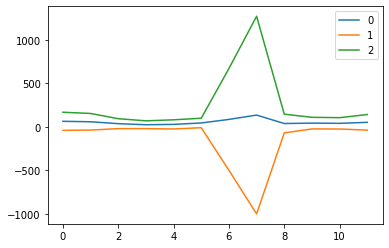

In [149]:
DDD.plot()

In [155]:
channel_one.groupby(channel_one.TimeStamp.dt.year)['pm2_5'].describe()

,count,mean,std,min,25%,50%,75%,max
TimeStamp,,,,,,,,
2019,16719.0,59.579169,47.443451,1.93,27.57,43.02,76.425,609.17
2020,237305.0,59.988219,224.187822,0.00,20.22,37.47,56.030,3663.30
2021,153028.0,47.896370,151.089488,0.00,18.27,34.50,50.380,3772.25


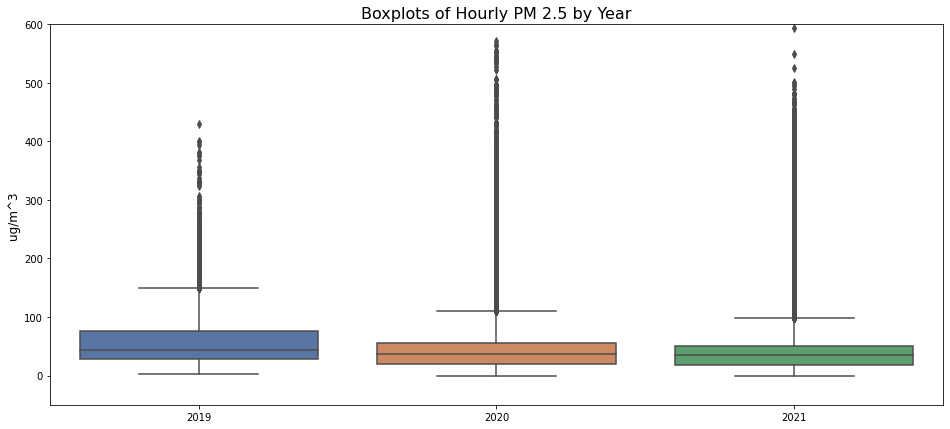

In [153]:
plt.figure(figsize=(16,7))

ax=sns.boxplot(x=channel_one.TimeStamp.dt.year, y='pm2_5', data=channel_one, orient='v', palette = sns.color_palette("deep", 5))
ax.set(ylim=(-50, 600))

plt.title('Boxplots of Hourly PM 2.5 by Year', fontsize=16)
plt.xlabel('')
plt.ylabel('ug/m^3', fontsize=12);

In [ ]:
fig = plt.figure(figsize=(14,10))
testing[['date', 'pm2_5', 'pm10', 's2_pm2_5', 's2_pm10']].plot(x='date', subplots=True, layout=(2,2),
                                                              figsize=(14,10), sharex=False, rot=45)
plt.tight_layout(pad=5)

In [25]:
#delta = datetime.timedelta(hours=24)

In [27]:
pd.to_numeric?